In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("news_dataset.csv")
df

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...
...,...,...
3724,REAL,19:17 (IST) Sep 20\n\nThe second round of coun...
3725,REAL,19:17 (IST) Sep 20\n\nThe second round of coun...
3726,FAKE,The Bengaluru City Police’s official Twitter h...
3727,REAL,"Sep 20, 2020, 08:00AM IST\n\nSource: TOI.in\n\..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729 entries, 0 to 3728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3729 non-null   object
 1   text    3721 non-null   object
dtypes: object(2)
memory usage: 58.4+ KB


In [4]:
df.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
FAKE   1871   1851  Our website is made possible by displaying onl...   19
REAL   1850    378  Highest IPL score in Dubai\n\nMilestones to wa...   79

In [5]:
df.isnull().sum()

label    0
text     8
dtype: int64

In [6]:
data=df.dropna(axis=0)
data

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...
...,...,...
3724,REAL,19:17 (IST) Sep 20\n\nThe second round of coun...
3725,REAL,19:17 (IST) Sep 20\n\nThe second round of coun...
3726,FAKE,The Bengaluru City Police’s official Twitter h...
3727,REAL,"Sep 20, 2020, 08:00AM IST\n\nSource: TOI.in\n\..."


In [7]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
data['length']=data['text'].apply(len)
data.head()

C:\Users\asmit\AppData\Local\Temp\ipykernel_8684\308746658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length']=data['text'].apply(len)


,label,text,length
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...,538
1,FAKE,A four-minute-long video of a woman criticisin...,3406
2,FAKE,"Republic Poll, a fake Twitter account imitatin...",3084
3,REAL,"Delhi teen finds place on UN green list, turns...",2383
4,REAL,Delhi: A high-level meeting underway at reside...,5572


<Axes: ylabel='Frequency'>

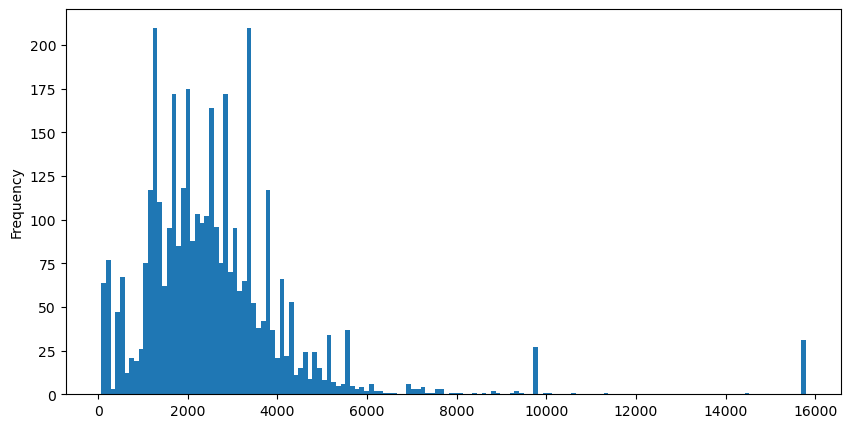

In [9]:
plt.figure(figsize=(10,5))
data["length"].plot.hist(bins=150)

In [10]:
data['length'].describe()

count     3721.000000
mean      2648.977963
std       1915.407606
min         67.000000
25%       1588.000000
50%       2391.000000
75%       3337.000000
max      15782.000000
Name: length, dtype: float64

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
mess=['''For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..''']

In [13]:
nopunc=[char for char in mess if char not in string.punctuation]
nopunc

["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."]

In [14]:
nltk.download("stopwords")
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asmit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return[word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

In [16]:
# data["text"].apply(text_process)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vow_transformer=CountVectorizer(analyzer=text_process).fit(data['text'])
vow_transformer.vocabulary_

In [ ]:
message_vow=vow_transformer.transform(df["text"])
message_vow